# Check distribution of likelihood ratio against Wilk's theorem

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

## Data

In [15]:
filenames = [
    "carl_aux",
    "alice_aux",
    "alices_aux",
    "calibrated_carl_aux",
    "calibrated_alice_aux",
    "calibrated_alices_aux",
]
labels = [
    "CARL",
    "ALICE",
    "ALICES",
    "CARL (cal)",
    "ALICE (cal)",
    "ALICES (cal)",
]
nmethods = len(filenames)


In [16]:
llrs = []
for filename in filenames:
    llrs.append(np.load("../data/results/llr_{}_grid.npy".format(filename)))
    print(llrs[-1].shape)
llrs = np.array(llrs)

(625, 100000)
(625, 100000)
(625, 100000)
(625, 100000)
(625, 100000)
(625, 100000)


## Calculate likelihood ratio wrt best fit

In [17]:
grid_res = 25

alpha_test = np.linspace(10., 400., grid_res)
beta_test = np.linspace(-1.1, -3., grid_res)

theta0, theta1 = np.meshgrid(alpha_test, beta_test)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T

bin_size = alpha_test[1] - alpha_test[0]
alpha_edges = np.linspace(alpha_test[0] - bin_size/2, alpha_test[-1] + bin_size/2, grid_res + 1)
bin_size = beta_test[1] - beta_test[0]
beta_edges = np.linspace(beta_test[0] - bin_size/2, beta_test[-1] + bin_size/2, grid_res + 1)

In [18]:
idx_mle = np.argmax(llrs, axis=1)
theta_mle = theta_grid[idx_mle]

In [19]:
for i in range(nmethods):
    bincount = np.bincount(idx_mle[0])
    idx_mle_max = np.argmax(bincount)
    n_mle_max = np.max(bincount)
    print(labels[i], theta_grid[idx_mle_max], n_mle_max / len(idx_mle[0]))

CARL [10. -3.] 0.09614
ALICE [10. -3.] 0.09614
ALICES [10. -3.] 0.09614
CARL (cal) [10. -3.] 0.09614
ALICE (cal) [10. -3.] 0.09614
ALICES (cal) [10. -3.] 0.09614


In [20]:
idx_true = 259
llr_true = llrs[:, idx_true]
print(theta_grid[idx_true])
llr_mle = np.max(llrs, axis=1)

[156.25        -1.89166667]


In [21]:
q = -2. * (llr_true - llr_mle)

In [22]:
llrs[0]

array([[-1.494737  , -2.0828311 , -5.0026736 , ..., -1.2753912 ,
         0.14221494, -0.9358117 ],
       [-2.3904953 , -2.9668715 , -5.1847425 , ..., -2.153776  ,
        -0.28296775, -1.1102751 ],
       [-3.23777   , -3.873206  , -5.3969293 , ..., -3.0909107 ,
        -0.68240625, -1.164197  ],
       ...,
       [-3.0859547 , -0.76428163, -5.16395   , ..., -1.1178483 ,
        -2.5680058 , -0.695555  ],
       [-3.1894133 , -0.7805436 , -5.284975  , ..., -1.1485467 ,
        -2.6252413 , -0.60108674],
       [-3.292871  , -0.79680544, -5.401467  , ..., -1.1878273 ,
        -2.6787305 , -0.56460977]], dtype=float32)

## Plot test statistic histo

In [23]:
qmin = 0.
qmax = 8.
qbins = 100


In [24]:
wilks = chi2.rvs(size=100000, df=2)

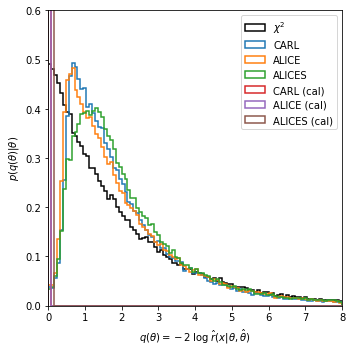

In [28]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.hist(
    wilks, range=(qmin, qmax), bins=qbins,
    histtype="step", density=True,
    lw=1.5, color="black",
    label=r"$\chi^2$"
)
for i in range(nmethods):
    plt.hist(
        q[i], range=(qmin, qmax), bins=qbins,
        histtype="step", density=True,
        lw=1.5, color="C{}".format(i),
        label=labels[i]
    )
    
plt.legend()
    
#ax.set_yscale("log")
plt.xlim(qmin, qmax)
plt.ylim(0., .6)

plt.xlabel(r"$q(\theta) = -2\; \log \; \hat{r}(x|\theta, \hat{\theta})$")
plt.ylabel(r"$p(q(\theta) | \theta)$")
    
plt.tight_layout()
plt.savefig("../figures/chi_squared.pdf")

## Plot MLE

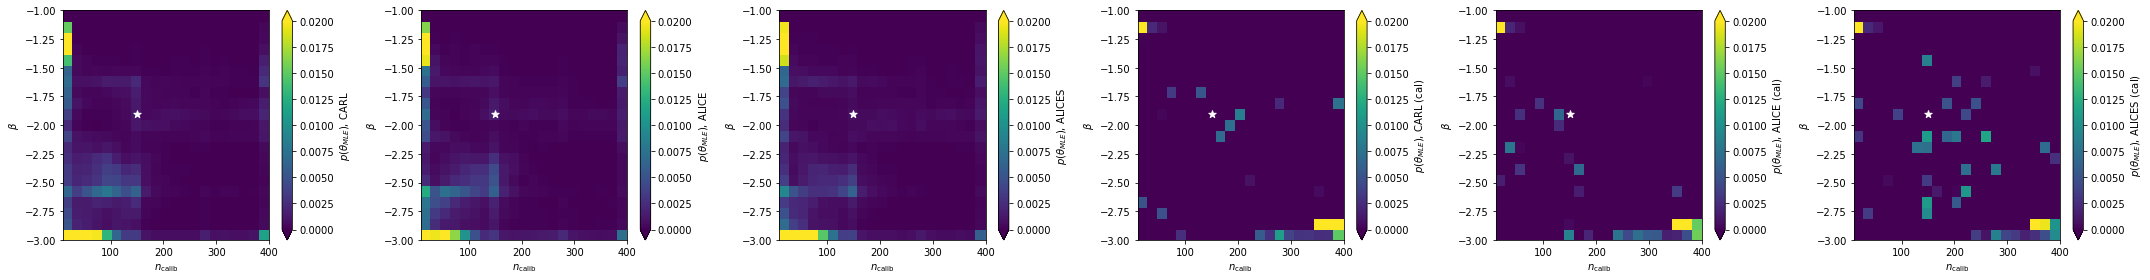

In [29]:
fig = plt.figure(figsize=(nmethods * 5, 4.))

for i in range(nmethods):
    ax = plt.subplot(1, nmethods, i+1)
    
    cm = plt.hist2d(
        theta_mle[i,:,0], theta_mle[i,:,1],
        bins=[21, 21],
        range=[[10.,400.], [-3.,-1.]],
        normed=True,
        norm=matplotlib.colors.Normalize(0., 0.02),
        cmap="viridis"
    )[3]
    cbar = fig.colorbar(cm, ax=ax, extend='both', )
    cbar.set_label(r'$p(\theta_{MLE})$' + ', {}'.format(labels[i]))
    plt.scatter(150., -1.9, s=60., color='white', marker='*')

    plt.xlabel(r'$n_{\mathrm{calib}}$')
    plt.ylabel(r'$\beta$')
    
plt.tight_layout()
plt.savefig("../figures/mle_distribution.pdf")